__*SHAMSUDDEEN YUSUF*__
ASSIGNMENT 3
ADS/P7/24/035

__Import the necessary library__

Data source [student-sleep-monitoring-datasets](https://www.kaggle.com/datasets/valencaycodes/simulated-student-sleep-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__Load the dataset__

In [2]:
sleep_df = pd.read_csv('simulated_student_sleep_data.csv')
sleep_df.head()

,Student_ID,Sleep_Hours,Stress_Level,Year,Major,Use_Sleep_Tech,Sleep_Issues,GPA
0,STUD001,7.1,3,3rd,Arts,Yes,Yes,3.76
1,STUD002,6.3,7,3rd,Commerce,No,No,3.68
2,STUD003,7.3,9,1st,Science,No,No,3.59
3,STUD004,8.3,7,3rd,Commerce,Yes,Yes,3.40
4,STUD005,6.2,3,3rd,Arts,No,Yes,3.72


__Data info__

In [4]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student_ID      50 non-null     object 
 1   Sleep_Hours     50 non-null     float64
 2   Stress_Level    50 non-null     int64  
 3   Year            50 non-null     object 
 4   Major           50 non-null     object 
 5   Use_Sleep_Tech  50 non-null     object 
 6   Sleep_Issues    50 non-null     object 
 7   GPA             50 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 3.3+ KB


__Data summary description__

In [5]:
sleep_df.describe()

,Sleep_Hours,Stress_Level,GPA
count,50.000000,50.0000,50.000000
mean,6.222000,5.8000,3.540600
std,1.129979,2.2315,0.257875
min,4.100000,3.0000,2.950000
25%,5.450000,4.0000,3.392500
50%,6.200000,5.0000,3.520000
75%,6.900000,8.0000,3.742500
max,8.700000,9.0000,4.000000


__Data Shape__

In [6]:
sleep_df.shape

(50, 8)

__Checking for missing value__

In [7]:
sleep_df.isnull().sum()

Student_ID        0
Sleep_Hours       0
Stress_Level      0
Year              0
Major             0
Use_Sleep_Tech    0
Sleep_Issues      0
GPA               0
dtype: int64

There is no missing value in the dataset

What is the minimum and maximum sleeping hours 

In [15]:
# Maximum sleep duration
max_sleep = sleep_df['Sleep_Hours'].max()
print(f"Maximum sleep duration: {max_sleep} hours")

# Minimum sleep duration
min_sleep = sleep_df['Sleep_Hours'].min()
print(f"Minimum sleep duration: {min_sleep} hours")

Maximum sleep duration: 8.7 hours
Minimum sleep duration: 4.1 hours


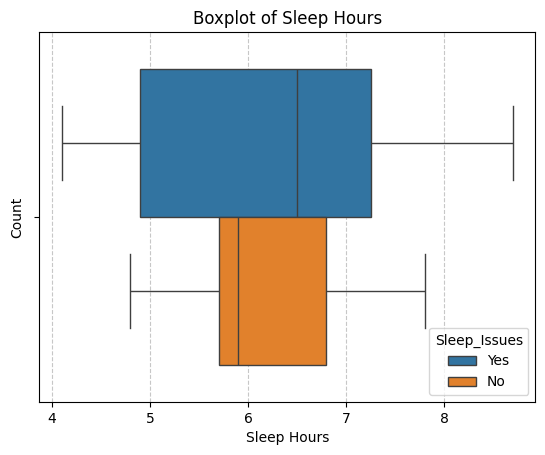

In [19]:
# does the data have any outliers?
sns.boxplot(x='Sleep_Hours', data=sleep_df, hue='Sleep_Issues')
plt.title('Boxplot of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Count')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The dataset is devoid of any outlier

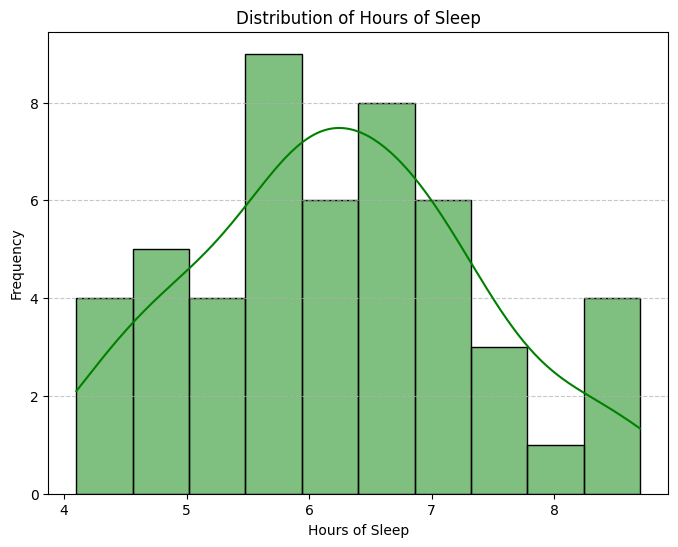

In [20]:
# Visualizing the distribution of sleep hours
plt.figure(figsize=(8, 6))
sns.histplot(x='Sleep_Hours', data=sleep_df, bins=10, color='green', edgecolor='black', kde=True)
plt.title('Distribution of Hours of Sleep')
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The distribution is approximately a bell shape, which means most people sleeping hours is within the average.

In [22]:
# mean sleep hours
mean_sleep = sleep_df['Sleep_Hours'].mean()
print(f"Mean Sleep Hours: {round(mean_sleep, 2)} hours")

Mean Sleep Hours: 6.22 hours


Is there any relationship between the number of hours a student sleep and his GPA?

Let see the correlation between the two.

In [23]:
# Sleep hours and GPA correlation
print(f"Correlation between Sleep Hours and GPA: {round(sleep_df['Sleep_Hours'].corr(sleep_df['GPA']),3)}")

Correlation between Sleep Hours and GPA: 0.303


There is correlation between although not very strong. However student the GPA is somewhat proportional to the sleeping hours. Most likely the student that sleeps tend to have relatively better GPA.

Let visualize the relationship using scatter plot

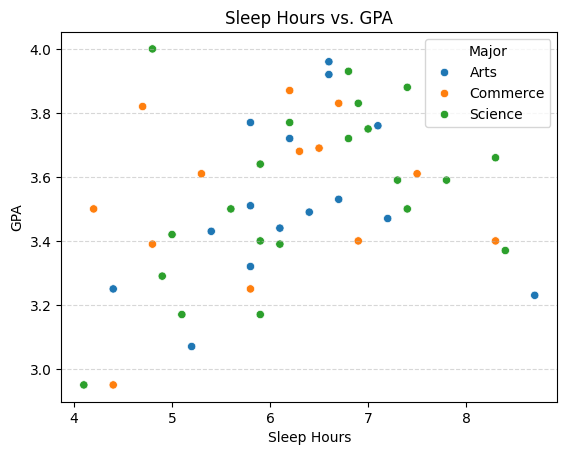

In [ ]:
# Scatter plot to visualize the relationship between sleep hours and GPA
sns.scatterplot(x='Sleep_Hours', y='GPA', data=sleep_df, hue='Major')
plt.title('Sleep Hours vs. GPA')
plt.xlabel('Sleep Hours')
plt.ylabel('GPA')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [27]:
science = sleep_df[sleep_df['Major'] == 'Science']
print((science.Sleep_Hours).corr(science.GPA))

0.4119118831205371


In [28]:
art = sleep_df[sleep_df['Major'] == 'Art']
print((art.Sleep_Hours).corr(art.GPA))

nan


In [29]:
commerce = sleep_df[sleep_df['Major'] == 'Commerce']
print((commerce.Sleep_Hours).corr(commerce.GPA))

0.2229598674659267


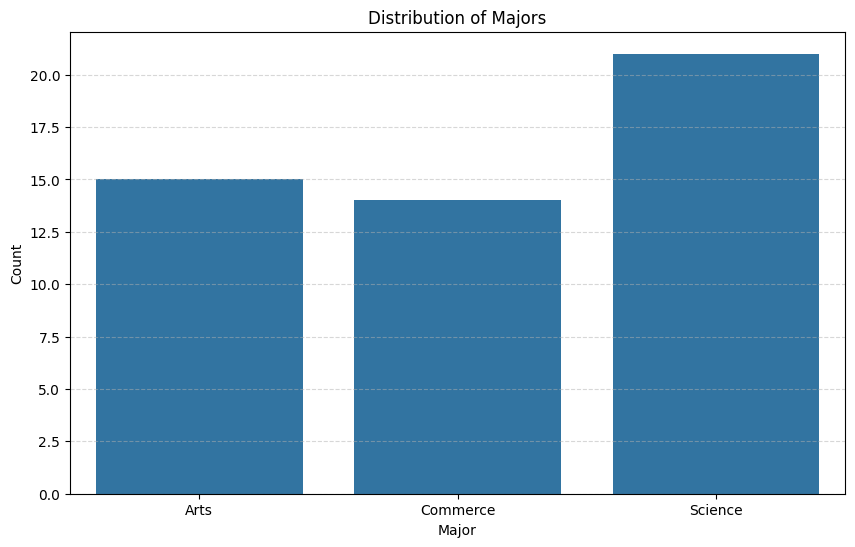

In [11]:
# Count plot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Major', data=sleep_df)
plt.title('Distribution of Majors')
plt.xlabel('Major')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()